In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import io
from google.colab import files
# La red neuronal perceptrón multi capa, para clasificación
from sklearn.neural_network import MLPClassifier

# matriz de confusión: https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# métricas para evaluar la clasificación predicha
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.model_selection import train_test_split

In [ ]:
#Loader de archivo / Ejecutar y cargar el archivo con el widget
archivoCargado = files.upload()

Saving datos_desercion_universitaria_5_semanas.csv to datos_desercion_universitaria_5_semanas.csv


In [ ]:
#Carga el archivo levantado por el loader y da una muestra del dataset
for archivo in archivoCargado.keys():
  data = pd.read_csv(io.StringIO(archivoCargado[archivo].decode('utf-8')))
data.head()

,Nombre.completo.del.usuario,Algún contenido ha sido publicado.,Comentario creado,Curso visto,Entrega creada.,Finalización de actividad de curso actualizada,Formulario de entrega visto.,Ha comenzado el intento,Intento de cuestionario visualizado,Intento del cuestionario revisado,Intento enviado,Mensaje creado,Módulo de curso visto,Perfil de usuario visto,Resumen del intento de cuestionario visualizado,Se ha enviado una entrega,Se ha suscrito a esta discusión,Se ha visualizado el estado de la entrega.,Tema creado,Tema visto,Un fichero ha sido subido.,Usuario calificado,Lista de usuarios vista,Mensaje borrado,Se ha borrado la suscripción de esta discusión,Tema borrado,Informe de notas de usuario visto,Mensaje actualizado,Instancia del módulo del curso visualizada,Informe de resumen de notas visto,Lista de insignias vista,Envío actualizado.,Rol asignado,Usuario matriculado en el curso,Elemento de calificación actualizado,Informe del usuario visualizado,Informe usuario del curso visto,Suscripción activada,Curso actualizado,Grupo creado,Elemento de calificación creado,Curso creado,Instancia de inscripción creada,Sección de curso actualizado,Sección del curso creada,completo
0,1013,4,1,531,1,5,2,1,5,1,1,2,180,8,1,1,2,4,2,107,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1035,2,0,39,0,0,0,0,0,0,0,0,14,3,0,0,2,0,2,36,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1063,0,0,87,0,1,0,0,0,0,0,0,27,6,0,0,0,0,0,3,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1067,2,0,104,0,0,0,1,3,2,1,1,10,5,2,0,1,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1082,4,0,83,0,0,0,1,2,2,1,1,35,0,1,0,3,1,2,10,0,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.describe()

,Nombre.completo.del.usuario,Algún contenido ha sido publicado.,Comentario creado,Curso visto,Entrega creada.,Finalización de actividad de curso actualizada,Formulario de entrega visto.,Ha comenzado el intento,Intento de cuestionario visualizado,Intento del cuestionario revisado,Intento enviado,Mensaje creado,Módulo de curso visto,Perfil de usuario visto,Resumen del intento de cuestionario visualizado,Se ha enviado una entrega,Se ha suscrito a esta discusión,Se ha visualizado el estado de la entrega.,Tema creado,Tema visto,Un fichero ha sido subido.,Usuario calificado,Lista de usuarios vista,Mensaje borrado,Se ha borrado la suscripción de esta discusión,Tema borrado,Informe de notas de usuario visto,Mensaje actualizado,Instancia del módulo del curso visualizada,Informe de resumen de notas visto,Lista de insignias vista,Envío actualizado.,Rol asignado,Usuario matriculado en el curso,Elemento de calificación actualizado,Informe del usuario visualizado,Informe usuario del curso visto,Suscripción activada,Curso actualizado,Grupo creado,Elemento de calificación creado,Curso creado,Instancia de inscripción creada,Sección de curso actualizado,Sección del curso creada,completo
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,5104.920530,1.059603,0.006623,142.635762,0.033113,2.874172,0.092715,0.483444,1.933775,0.523179,0.364238,0.437086,38.291391,2.350993,0.443709,0.039735,0.668874,0.973510,0.509934,20.211921,0.039735,0.357616,1.728477,0.026490,0.052980,0.026490,0.456954,0.112583,0.827815,0.066225,0.066225,0.006623,0.086093,0.086093,0.006623,0.019868,0.006623,0.026490,0.033113,0.013245,0.006623,0.006623,0.019868,0.006623,0.033113,0.476821
std,2581.667873,2.355792,0.081379,124.013896,0.179526,4.587381,0.405808,0.587132,3.535852,0.855059,0.535206,1.444881,39.061761,3.670057,0.726964,0.227473,1.417612,1.535999,1.130590,27.404527,0.227473,0.520825,2.763895,0.198226,0.322244,0.198226,1.393964,0.455237,3.537912,0.377163,0.298192,0.081379,0.832189,0.832189,0.081379,0.181483,0.081379,0.161122,0.268756,0.162758,0.081379,0.081379,0.244137,0.081379,0.406894,0.501125
min,1013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2870.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5092.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7208.500000,1.000000,0.000000,195.500000,0.000000,4.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,56.000000,3.500000,1.000000,0.000000,1.000000,1.000000,1.000000,

Se realizan graficos para un analisis inicial de limpieza de datos

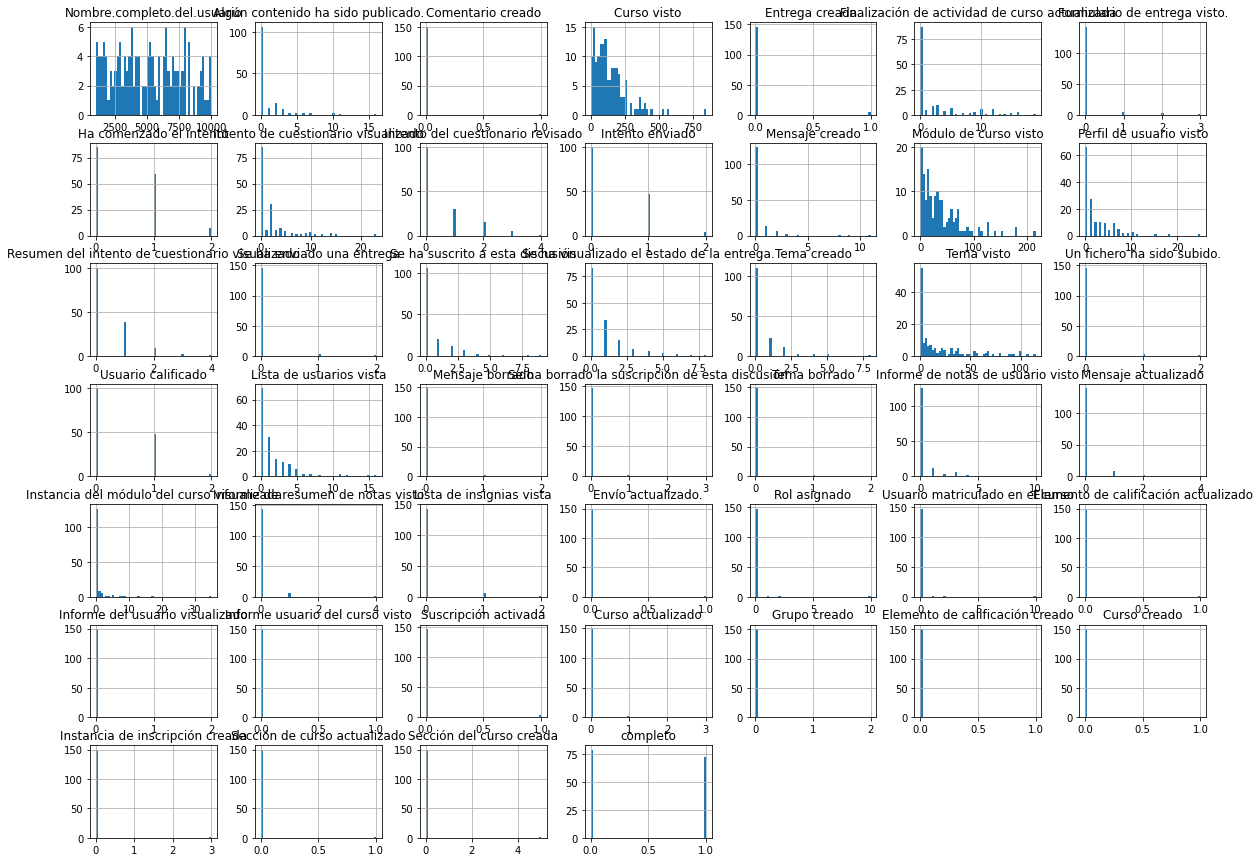

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
##Se busca una correlacion lineal de datos
corr_matrix = data.corr()
corr_matrix["completo"].sort_values(ascending=False)

completo                                           1.000000
Curso visto                                        0.475139
Módulo de curso visto                              0.434579
Intento enviado                                    0.416965
Usuario calificado                                 0.415116
Intento del cuestionario revisado                  0.409672
Ha comenzado el intento                            0.389543
Tema visto                                         0.381920
Se ha visualizado el estado de la entrega.         0.362962
Resumen del intento de cuestionario visualizado    0.348669
Algún contenido ha sido publicado.                 0.286357
Perfil de usuario visto                            0.267255
Se ha suscrito a esta discusión                    0.261271
Tema creado                                        0.250453
Mensaje creado                                     0.225852
Intento de cuestionario visualizado                0.221112
Entrega creada.                         

In [ ]:
atributos = ["Módulo de curso visto","Intento enviado", "Intento del cuestionario revisado","Ha comenzado el intento","Tema visto","Se ha visualizado el estado de la entrega."]

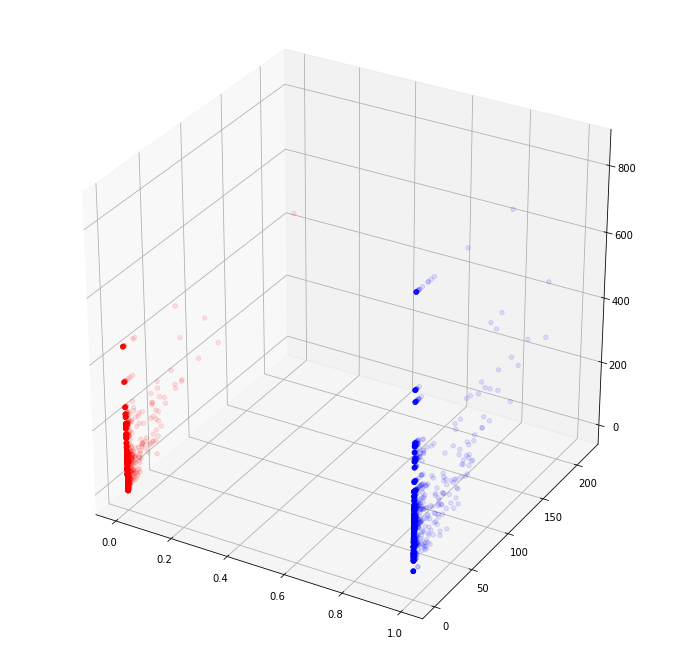

In [ ]:
#Grafico de distribucion 3d

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

#Se generan dos dataframe para analisis
dataNoAprobados = data[data['completo'] == 0]
zNoAprobados = dataNoAprobados['Curso visto']
dataAprobados = data[data['completo'] == 1]
zAprobados = dataAprobados['Curso visto']

#Se quitan 'completo' y 'Curso visto' que van a ser utilizados como ejes
#Tambien se hace un drop del nombre que no se considera util
dataGroupN = dataNoAprobados.iloc[:,1: 44]
noCursoData = dataGroupN.drop(['Curso visto','Sección de curso actualizado', 'Instancia de inscripción creada', 
                               'Curso creado', 'Rol asignado', 'Elemento de calificación creado', 'Grupo creado', 'Curso actualizado', 'Mensaje borrado', 'Tema borrado',
                               'Informe usuario del curso visto', 'Informe del usuario visualizado', 'Usuario calificado', 'Entrega creada.', 'Un fichero ha sido subido.'], axis=1)

#Agrega elementos del dataframe noCurso
for dataElement in noCursoData: 
  ax.scatter(0,dataNoAprobados[dataElement] ,zNoAprobados, color='red', alpha=0.1)

dataGroupA = dataAprobados.iloc[:,1: 44]
cursoData = dataGroupA.drop(['Curso visto','Sección de curso actualizado', 'Instancia de inscripción creada', 'Curso creado', 'Rol asignado', 
                             'Elemento de calificación creado', 'Grupo creado', 'Curso actualizado', 'Informe usuario del curso visto', 'Mensaje borrado', 'Tema borrado',
                             'Informe del usuario visualizado', 'Usuario calificado', 'Entrega creada.', 'Un fichero ha sido subido.'], axis=1)

#Agrega elementos del dataframe Curso
for dataElement in cursoData:
  ax.scatter(1,dataAprobados[dataElement],zAprobados, color='blue', alpha=0.1)

# Decorate y show
plt.show()

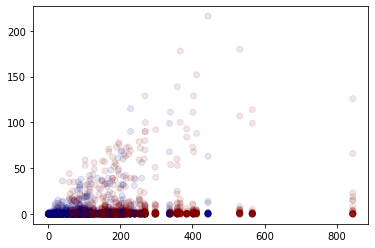

In [ ]:
y=data["completo"]
z=data["Curso visto"]

#Nuevamente se borran nombre, curso visto y completo
dataCortado = data.iloc[:,1:44]
xGrafico = dataCortado.drop(['Curso visto','Sección de curso actualizado', 'Instancia de inscripción creada', 
                      'Curso creado', 'Rol asignado', 'Elemento de calificación creado', 'Grupo creado', 'Curso actualizado', 'Mensaje borrado', 'Tema borrado',
                      'Informe usuario del curso visto', 'Informe del usuario visualizado', 'Usuario calificado', 'Entrega creada.', 'Un fichero ha sido subido.'], axis=1)
x = dataCortado.drop(['Sección de curso actualizado', 'Instancia de inscripción creada', 
                      'Curso creado', 'Rol asignado', 'Elemento de calificación creado', 'Grupo creado', 'Curso actualizado', 'Mensaje borrado', 'Tema borrado',
                      'Informe usuario del curso visto', 'Informe del usuario visualizado', 'Usuario calificado', 'Entrega creada.', 'Un fichero ha sido subido.'], axis=1)
#Quitar "Un fichero ha sido subido" destruye el predictivo por algun motivo
#Agrega los elementos del dataframe al grafico
for dataElement in xGrafico:
  plt.scatter(z, data[dataElement],c=y, cmap=plt.get_cmap("jet"), alpha=0.1)

# Decorate y show
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(9,4), activation="tanh", random_state=True)
mlp.fit(X_train,y_train)

mlp.n_layers_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4

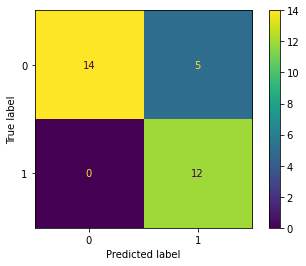

In [ ]:
y_pred = mlp.predict(X_test)

# En general es una mala idea predecir con los mismos datos de entrenamiento: recordar que el objetivo es
# predecir la clasif. de datos NUEVOS no utilizados para entrenar el modelo.
# Esto tiene que ver con train/test split y con CV (Cross Validation).

# matriz de confusión
conf = confusion_matrix(y_test,y_pred)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=mlp.classes_)
disp.plot(values_format='d') 

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred_test)
# precision = precision_score(y_test, y_pred_test)

# print('Métricas sobre datos nuevos de TEST')
print('Accuracy: ', round(accuracy,2))
print('Es decir ', 100*round(accuracy,2), '% de los datos clasificados correctamente')

Accuracy:  0.84
Es decir  84.0 % de los datos clasificados correctamente


In [ ]:
y_pred_probas = mlp.predict_proba(x)

with np.printoptions(precision=3, suppress=True):
    print(y_pred_probas[0:10])

[[0.369 0.631]
 [0.568 0.432]
 [0.39  0.61 ]
 [0.384 0.616]
 [0.56  0.44 ]
 [0.379 0.621]
 [0.369 0.631]
 [0.385 0.615]
 [0.457 0.543]
 [0.668 0.332]]
